**Age and Gender prediction**  
**using Convolutional Neural Network**  
**Data from Kaggle UTK face (2022)**

**Importing all the necessary libraries**

In [3]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns
import warnings 
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D,Input

**Loading the dataset**

In [5]:
Dir = 'UTKFace'

In [6]:
# Labels from the data  -> 'Age','Gender','Ethnicity'
#for this project we will be concerned only with the 'Age and Gender' labels only, as we are predicting only for both.
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(Dir)):
    image_path = os.path.join(Dir,filename)
    #creating a temporary file for the image after spliting. 0th index=[age],1th index=[gender]
    temp = filename.split('_') #using (_) because the data is been separated with underscore 
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)
    
    

  0%|          | 0/23708 [00:00<?, ?it/s]

**Converting the extracted labels into a DataFrame**

In [7]:
#creating a DataFrame object 
df = pd.DataFrame()
df['Image'] = image_paths
df['Age'] = age_labels
df['Gender'] = gender_labels
df.head()

,Image,Age,Gender
0,UTKFace\100_0_0_20170112213500903.jpg.chip.jpg,100,0
1,UTKFace\100_0_0_20170112215240346.jpg.chip.jpg,100,0
2,UTKFace\100_1_0_20170110183726390.jpg.chip.jpg,100,1
3,UTKFace\100_1_0_20170112213001988.jpg.chip.jpg,100,1
4,UTKFace\100_1_0_20170112213303693.jpg.chip.jpg,100,1


In [8]:
#creating a new Dataframe where  0 = Male and 1 = Female 

 ## ___ male = df.loc[df['Gender']==0,'Male']='Male'
##  ___ female = df.loc[df['Gender']==1,'Female']='female'

In [9]:
# Mapping Labels for gender using dictionary 

gender_dict = {0:'Male',1:'Female'}

**Performing EDA on data (Explanatory Data Analysis)**

In [10]:
from PIL import Image

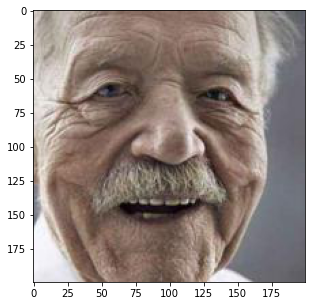

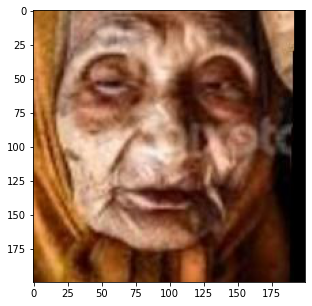

In [11]:
plt.figure(figsize=(5,5))
img = Image.open(df['Image'][0])
plt.axis=("off")
plt.imshow(img);


plt.figure(2,figsize=(5,5))
plt.subplot(1,1,1)
img1 = Image.open(df['Image'][10])
plt.axis=("off")
plt.imshow(img1);


<AxesSubplot:xlabel='Age', ylabel='Density'>

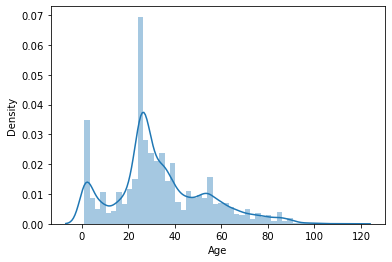

In [12]:
## Displaying the Age distribution 

sns.distplot(df['Age'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

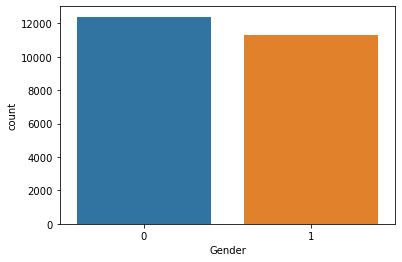

In [13]:
#Counting the nukmber of male and female genders.

sns.countplot(df['Gender'])

**Displaying grid of images**

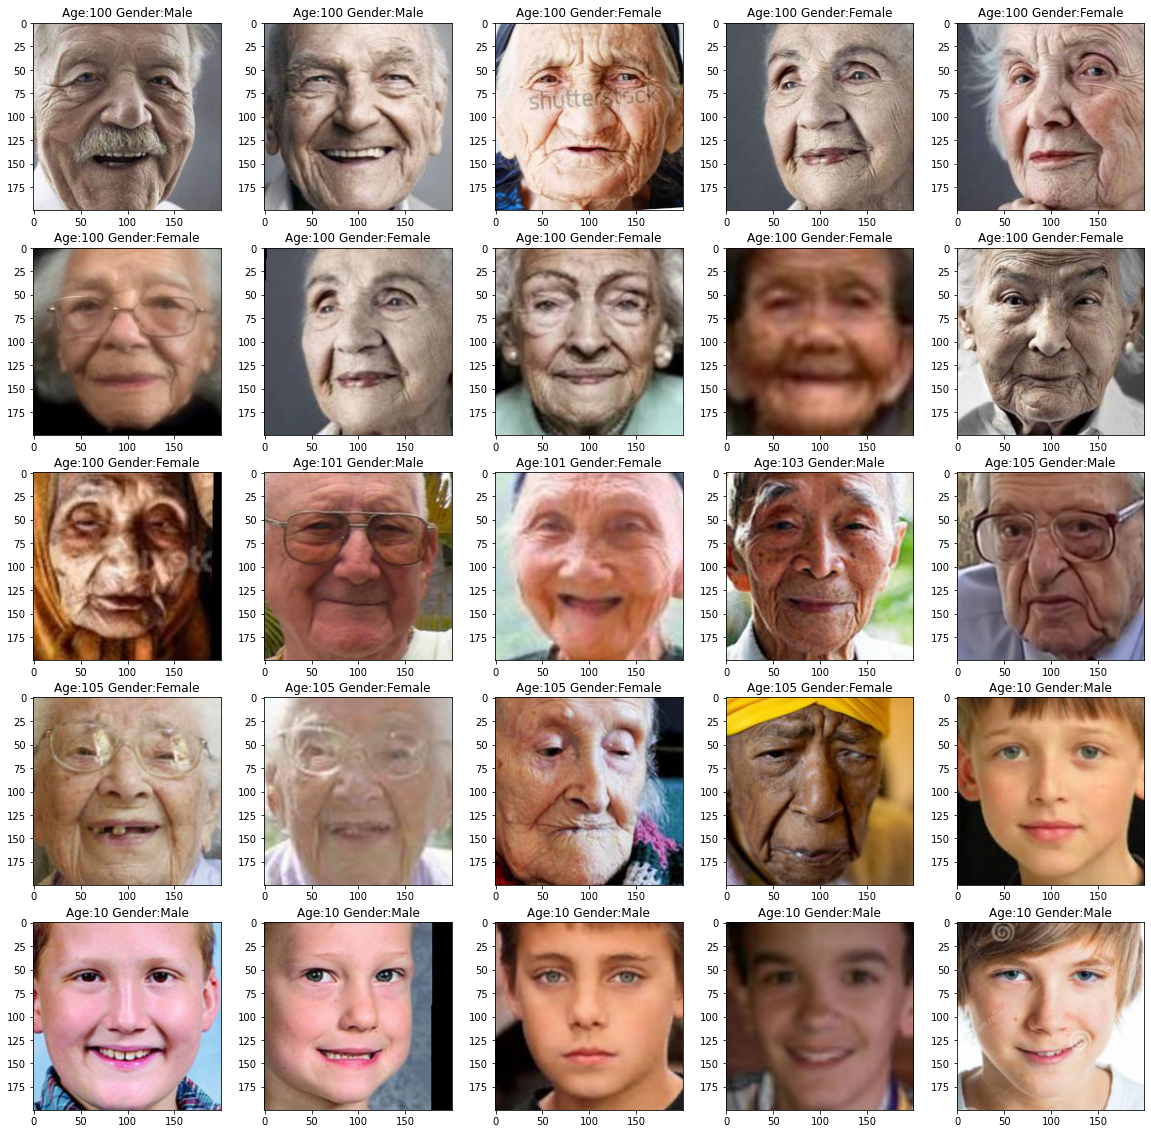

In [14]:
plt.figure(figsize=(20,20))
files = df.iloc[0:25]
for index,file,Age,Gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img=load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title(f"Age:{Age} Gender:{gender_dict[Gender]}")
    plt.axis=("off")

**Extracting Features from the image**

In [15]:
# defining a function called Feature Extraction 

def extract_features(images):
    Features=[]
    for image in tqdm(images):
        img = load_img(image,grayscale=True)
        img = img.resize((128,128),Image.ANTIALIAS)
        img = np.array(img)
        Features.append(img)
        
    Features = np.array(Features)
    Features = Features.reshape((len(Features)),128,128,1)
    return Features

In [16]:
X = extract_features(df['Image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [17]:

#Normalize the data X. X here been the features 
X = X/255.0

In [18]:
#converting GEnder and age labels into numpy # Y here been the targets
y_gender = np.array(df['Gender'])
y_age = np.array(df['Age'])

**convolutional model creation**

In [19]:
X.shape

(23708, 128, 128, 1)

In [20]:
input_shape = X.shape[1:4]

In [33]:
inputs = Input((input_shape))
#convolutional layers 
conv_1 = Conv2D(32,kernel_size=(3,3),activation="relu")(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64,kernel_size=(3,3),activation="relu")(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128,kernel_size=(3,3),activation="relu")(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_4 = Conv2D(256,kernel_size=(3,3),activation="relu")(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

##flattening the image 
flatten = Flatten()(maxp_4)

##fully connected layers 
dense_1 = Dense(256,activation="relu")(flatten)
dense_2 = Dense(256,activation="relu")(flatten)

## applying dropout

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1,activation="sigmoid",name="gender_out")(dropout_1)
output_2 = Dense(1, activation="relu",name="age_out")(dropout_2)

## creating the model 

model = Model(inputs=[inputs],outputs=[output_1,output_2])
model.compile(loss=["binary_crossentropy","mae"],optimizer="adam",metrics=("accuracy"))


**summarizing the created model**

In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 126, 126, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 63, 63, 32)  0           ['conv2d_8[0][0]']               
                                                                                            

**plotting the model**

In [35]:
#from tensorflow.keras.utils import plot_model
#plot_model(model)

**Training the Model**

In [36]:
history = model.fit(x=X,y=[y_gender,y_age],batch_size=32,epochs=30,validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 596s 1s/step - loss: 11.0121 - gender_out_loss: 0.6848 - age_out_loss: 10.3273 - gender_out_accuracy: 0.5413 - age_out_accuracy: 0.0589 - val_loss: 29.4886 - val_gender_out_loss: 0.6018 - val_age_out_loss: 28.8868 - val_gender_out_accuracy: 0.6885 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 577s 972ms/step - loss: 8.1840 - gender_out_loss: 0.4829 - age_out_loss: 7.7011 - gender_out_accuracy: 0.7705 - age_out_accuracy: 0.0394 - val_loss: 29.2570 - val_gender_out_loss: 0.5281 - val_age_out_loss: 28.7288 - val_gender_out_accuracy: 0.7512 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 594s 1s/step - loss: 7.4572 - gender_out_loss: 0.4000 - age_out_loss: 7.0571 - gender_out_accuracy: 0.8141 - age_out_accuracy: 0.0269 - val_loss: 31.8348 - val_gender_out_loss: 0.4912 - val_age_out_loss: 31.3436 - val_gender_out_accuracy: 0.7701 - val_age_out_accuracy: 0

**PLOTTING THE RESULT**

<function matplotlib.pyplot.show(close=None, block=None)>

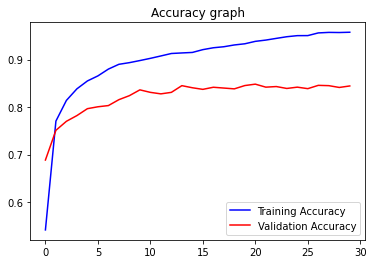

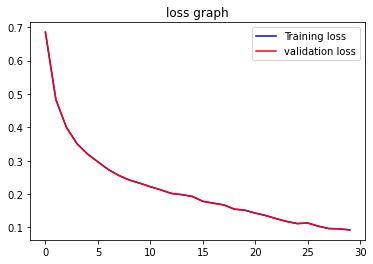

<Figure size 432x288 with 0 Axes>

In [40]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs,acc,'b',label="Training Accuracy")
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']
plt.plot(epochs,loss,'b',label="Training loss")
plt.plot(epochs,loss,'r',label="validation loss")
plt.title('loss graph')
plt.legend()
plt.figure()
plt.show

**predicting with test data with 100th image**

In [41]:
image_index = 100
print("original gender:",gender_dict[y_gender[image_index]],"orginal Age:",y_age[image_index])

original gender: Male orginal Age: 10


**Prediction from the model**

1/1 [==============================] - 0s 25ms/step
predicted gender: Male predicted age: 14


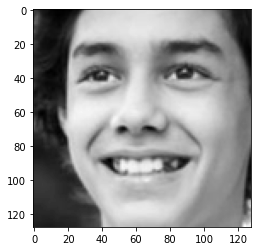

In [45]:
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("predicted gender:",pred_gender,"predicted age:",pred_age)
plt.axis=('off')
plt.imshow(X[image_index].reshape(128,128),cmap='gray')

**predicting with test data with 300th image**

In [46]:
image_index2 = 300
print("original gender:",gender_dict[y_gender[image_index2]],"orginal Age:",y_age[image_index2])

original gender: Female orginal Age: 12


1/1 [==============================] - 0s 24ms/step
predicted gender: Female predicted age: 14


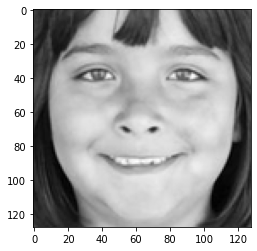

In [49]:
pred = model.predict(X[image_index2].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
preg_age = round(pred[1][0][0])
print("predicted gender:",pred_gender,"predicted age:",pred_age)
plt.axis=('off')
plt.imshow(X[image_index2].reshape(128,128),cmap='gray')

**predicting with test data with 1000th image**

In [50]:
image_index3 = 1000
print("original gender:",gender_dict[y_gender[image_index3]],"orginal Age:",y_age[image_index3])

original gender: Female orginal Age: 16


1/1 [==============================] - 0s 24ms/step
predicted gender: Female predicted age: 14


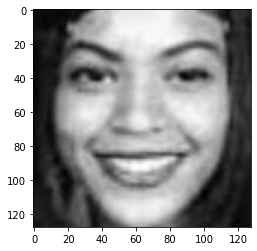

In [52]:
pred = model.predict(X[image_index3].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
preg_age = round(pred[1][0][0])
print("predicted gender:",pred_gender,"predicted age:",pred_age)
plt.axis=('off')
plt.imshow(X[image_index3].reshape(128,128),cmap='gray')

**predicting with test data with 5200th image**

In [53]:
image_index4 = 5200
print("original gender:",gender_dict[y_gender[image_index4]],"orginal Age:",y_age[image_index4])

original gender: Male orginal Age: 25


1/1 [==============================] - 0s 24ms/step
predicted gender: Male predicted age: 14


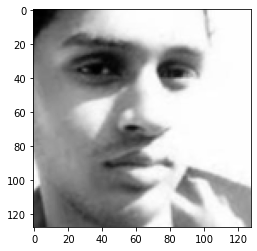

In [55]:
pred = model.predict(X[image_index4].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
preg_age = round(pred[1][0][0])
print("predicted gender:",pred_gender,"predicted age:",pred_age)
plt.axis=('off')
plt.imshow(X[image_index4].reshape(128,128),cmap='gray')

**Olatunde**  
**Thank you !!**